In [384]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [385]:
raw_data = pd.read_csv('Iris.csv')

In [386]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [387]:
sepal_length_setosa = raw_data[raw_data.Species=='Iris-setosa']['SepalLengthCm']
petal_length_setosa = raw_data[raw_data.Species=='Iris-setosa']['PetalLengthCm']
data_setosa = np.array([sepal_length_setosa,petal_length_setosa]).T

In [388]:
sepal_length_versicolor = raw_data[raw_data.Species=='Iris-versicolor']['SepalLengthCm']
petal_length_versicolor = raw_data[raw_data.Species=='Iris-versicolor']['PetalLengthCm']
data_versicolor = np.array([sepal_length_versicolor,petal_length_versicolor]).T

In [389]:
raw_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [390]:
species_mapping = {'Iris-setosa':-1,'Iris-versicolor':1,'Iris-virginica':0}

In [391]:
raw_data['SpeciesCategory'] = raw_data['Species'].map(species_mapping)

In [392]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCategory
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1


In [393]:
raw_data.drop(['Id','Species'],axis=1,inplace=True)

In [394]:
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesCategory
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


In [395]:
x_raw = np.vstack((data_setosa,data_versicolor))

In [396]:
y = [i for i in raw_data['SpeciesCategory'] if i is not 0]

In [397]:
data = pd.concat([pd.DataFrame(x_raw,columns=['Sepal_Length','Petal_Length']),pd.DataFrame(y,columns=['Species'])],axis=1)

In [398]:
data.head()

,Sepal_Length,Petal_Length,Species
0,5.1,1.4,-1
1,4.9,1.4,-1
2,4.7,1.3,-1
3,4.6,1.5,-1
4,5.0,1.4,-1


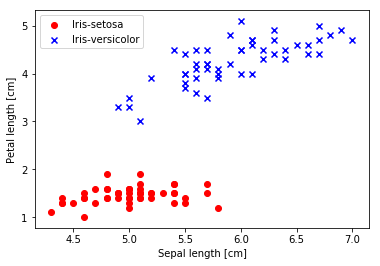

In [399]:
plt.scatter(data[data['Species']==-1]['Sepal_Length'],data[data['Species']==-1]['Petal_Length'],color='red',marker='o',label='Iris-setosa')
plt.scatter(data[data['Species']==1]['Sepal_Length'],data[data['Species']==1]['Petal_Length'],color='blue',marker='x',label='Iris-versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

In [400]:
class stochastic_gradient_descent:
    def __init__(self,iterations=10,learning_rate=0.01,shuffle=True,random_state=None):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.shuffle = shuffle
        self.random_state = random_state
     
    def initialize_weights(self,number_of_weights):
        self.rgen = np.random.RandomState(self.random_state)
        self.weights = self.rgen.normal(loc=0,scale=0.01,size=number_of_weights)
        
        
    def do_shuffling(self,x,y):
        random_index = self.rgen.permutation(len(y))
        return x[random_index],y[random_index]
    
    def apply_activation(self,x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    def update_weights(self,xi,yi):
        output = self.apply_activation(xi)
        error = yi - output
        # update weights
        self.weights[1:] += self.learning_rate*(np.dot(xi,error))
        self.weights[0] += self.learning_rate*(error)
        cost = 0.5 * error**2
        return cost
    
    def fit(self,X,y):
        self.initialize_weights(1 + X.shape[1])
        self.cost_afterEachIteration = []
        for i in range(self.iterations):
            if self.shuffle:
                X,y=self.do_shuffling(X,y)
            cost = []
            for xi,yi in zip(X,y):
                cost.append(self.update_weights(xi,yi))
            avg_cost = sum(cost) / len(y)
            self.cost_afterEachIteration.append(avg_cost)
        return self
    
    def predict(self,X):
        return np.where(self.apply_activation(X) >= 0.0 , 1,-1)
                

In [401]:
class batch_gradient_descent:
    def __init__(self,iterations=10,learning_rate=0.01,random_state=None):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.random_state = random_state
    
    def initialize_weights(self,number_of_weights):
        self.rgen = np.random.RandomState(self.random_state)
        self.weights = self.rgen.normal(loc=0,scale=0.01,size=number_of_weights)
    
    def apply_activation(self,x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    def update_weights(self,X,y):
        output = self.apply_activation(X)
        error = y - output
        self.weights[1:] += self.learning_rate*(np.dot(X.T,error))
        self.weights[0] += self.learning_rate*(error.sum())
        cost = 0.5 * (error**2)
        return cost
    
    def fit(self,X,y):
        self.initialize_weights(1 + X.shape[1])
        self.cost_afterEachIteration = []
        for i in range(self.iterations):
            cost = self.update_weights(X,y)
            avg_cost = sum(cost) / len(y)
            self.cost_afterEachIteration.append(avg_cost)
        return self
    
    def predict(self,X):
        return np.where(self.apply_activation(X) >= 0.0 , 1,-1)
            

In [402]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [403]:
#Standardizing the input data
from sklearn.preprocessing import StandardScaler

In [404]:
s_x = StandardScaler()
X_std = s_x.fit_transform(x_raw)

In [405]:
X_std = np.array(X_std)
y = np.array(y)

In [406]:
stochasticGD = stochastic_gradient_descent(iterations=15,learning_rate=0.01,random_state=1)

In [409]:
batchGD = batch_gradient_descent(iterations=15,learning_rate=0.01,random_state=1)

In [407]:
stochasticGD.fit(X_std,y)

In [410]:
batchGD.fit(X_std,y)

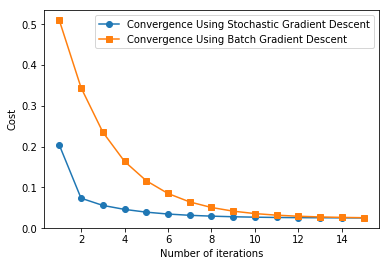

In [417]:
plt.plot(range(1,len(stochasticGD.cost_afterEachIteration) + 1), stochasticGD.cost_afterEachIteration,marker='o',label='Convergence Using Stochastic Gradient Descent')
plt.plot(range(1,len(batchGD.cost_afterEachIteration) + 1), batchGD.cost_afterEachIteration,marker='s',label='Convergence Using Batch Gradient Descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()